In [1]:
from util import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
plt.style.use('ggplot')
plt.style.use('seaborn-deep')

## MNIST : LR

In [4]:
lrs = [0.001]#[0.05, 0.01, 0.001]

In [6]:
fc_adam = torch.load('./MNIST/LR_Adam_0.001')
fc_asgd = torch.load('./MNIST/LR_accSGD')
fc_amsgrad = torch.load('./MNIST/LR_amsgrad')
fc_sug = torch.load('./MNIST/LR_sug')

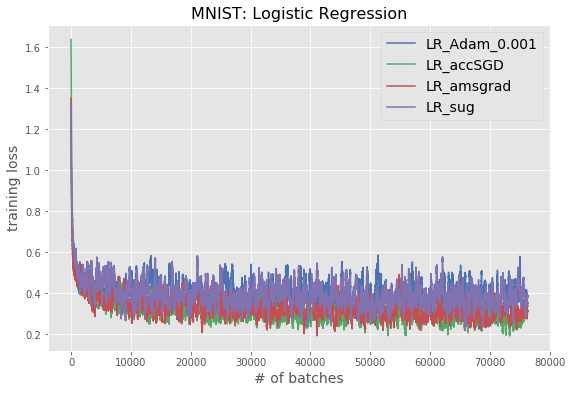

In [7]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(9,6))
loss = fc_adam['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_Adam_0.001')
loss = fc_asgd['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_accSGD')
loss = fc_amsgrad['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_amsgrad')
loss = fc_sug['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_sug')


plt.xlabel("# of batches", fontsize=14)
plt.ylabel("training loss", fontsize=14)
plt.title("MNIST: Logistic Regression", fontsize=16)
plt.legend(fontsize=14)
plt.savefig('img/mnist_linreg_bt.png')
plt.savefig('img/mnist_linreg_bt.eps')
plt.show()

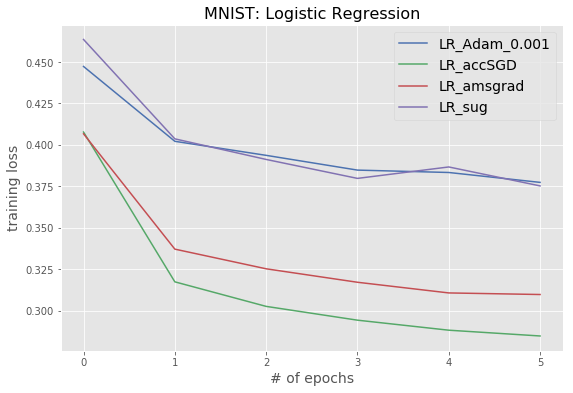

In [9]:
#plot train loss per epoch
figure = plt.figure(figsize=(9,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['tr_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['tr_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['tr_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_sug')

plt.xlabel("# of epochs", fontsize=14)
plt.ylabel("training loss", fontsize=14)
plt.title("MNIST: Logistic Regression", fontsize=16)
plt.legend(fontsize=14)
plt.savefig('img/mnist_linreg_ep.png')
plt.savefig('img/mnist_linreg_ep.eps')
plt.show()

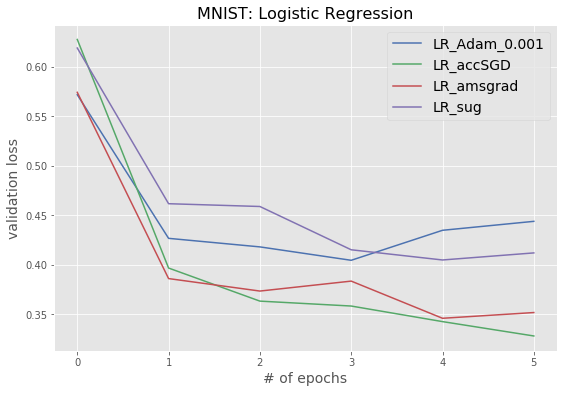

In [10]:
#plot validation loss per epoch
figure = plt.figure(figsize=(9,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['val_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['val_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['val_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_sug')

plt.xlabel("# of epochs", fontsize=14)
plt.ylabel("validation loss", fontsize=14)
plt.title("MNIST: Logistic Regression", fontsize=16)
plt.legend(fontsize=14)
plt.savefig('img/mnist_linreg_val_ep.png')
plt.savefig('img/mnist_linreg_val_ep.eps')
plt.show()

## MNIST : FC

In [19]:
fc_adam = torch.load('./MNIST/FC_Adam_0.001')
fc_asgd = torch.load('./MNIST/FC_accSGD')
fc_amsgrad = torch.load('./MNIST/FC_amsgrad')
fc_sug = torch.load('./MNIST/FC_sug')

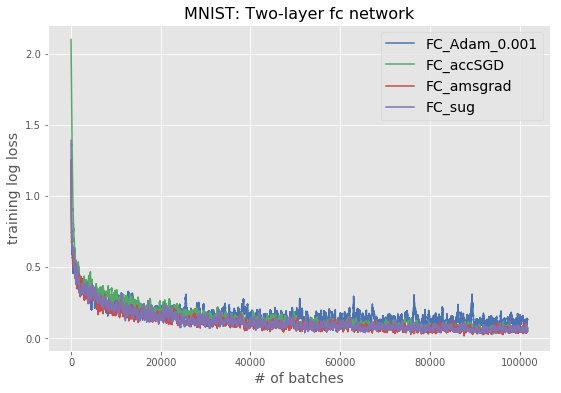

In [20]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(9,6))
loss = fc_adam['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='FC_Adam_0.001')
loss = fc_asgd['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='FC_accSGD')
loss = fc_amsgrad['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='FC_amsgrad')
loss = fc_sug['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='FC_sug')

plt.xlabel("# of batches", fontsize=14)
plt.ylabel("training log loss", fontsize=14)
plt.title("MNIST: Two-layer fc network", fontsize=16)
plt.legend(fontsize=14)
plt.savefig("img/mnist_fc_bt.png")
plt.savefig("img/mnist_fc_bt.eps")
plt.show()

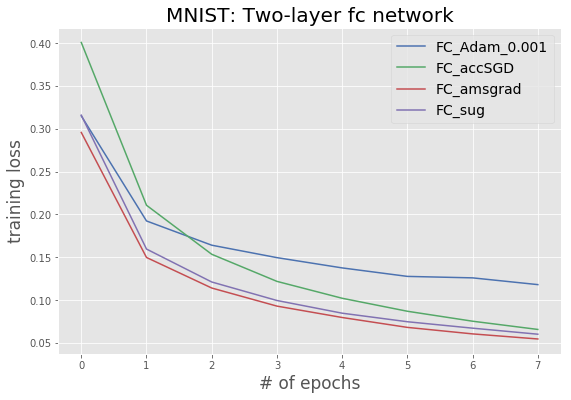

In [21]:
#plot train loss per epoch
figure = plt.figure(figsize=(9,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['tr_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='FC_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['tr_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='FC_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['tr_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='FC_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='FC_sug')

plt.xlabel("# of epochs", fontsize=17)
plt.ylabel("training loss", fontsize=17)
plt.title("MNIST: Two-layer fc network", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("img/mnist_fc_ep.eps")
plt.show()

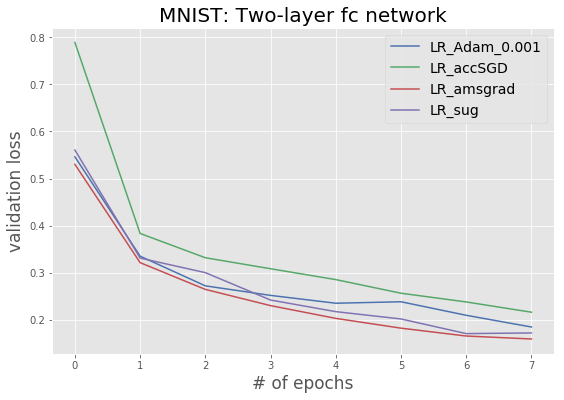

In [22]:
#plot validation loss per epoch
figure = plt.figure(figsize=(9,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['val_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['val_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['val_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_sug')

plt.xlabel("# of epochs", fontsize=17)
plt.ylabel("validation loss", fontsize=17)
plt.title("MNIST: Two-layer fc network", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("img/mnist_fc_val.eps")
plt.show()

## CIFAR10 : CNN


In [24]:
lrs = [0.001]
fc_adam = torch.load('./CIFAR10/CNN_Adam_0.001')
fc_asgd = torch.load('./CIFAR10/CNN_accSGD')
fc_amsgrad = torch.load('./CIFAR10/CNN_amsgrad')
fc_sug = torch.load('./CIFAR10/CNN_sug')

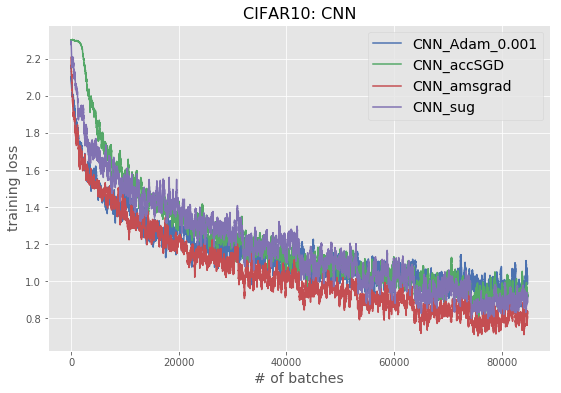

In [25]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(9,6))
loss = fc_adam['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='CNN_Adam_0.001')
loss = fc_asgd['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='CNN_accSGD')
loss = fc_amsgrad['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='CNN_amsgrad')
loss = fc_sug['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='CNN_sug')

plt.xlabel("# of batches", fontsize=14)
plt.ylabel("training loss", fontsize=14)
plt.title("CIFAR10: CNN", fontsize=16)
plt.legend(fontsize=14)
plt.savefig("img/cifar_cnn_bt.eps")
plt.show()

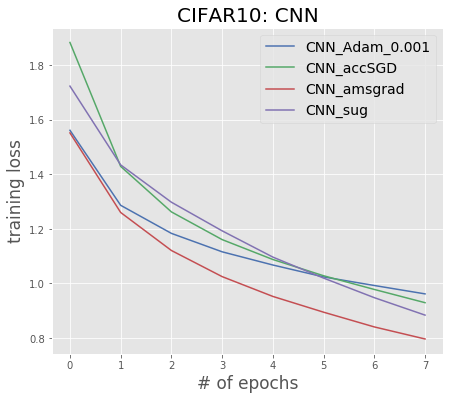

In [26]:
#plot train loss per epoch
figure = plt.figure(figsize=(7,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['tr_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='CNN_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['tr_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='CNN_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['tr_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='CNN_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='CNN_sug')

plt.xlabel("# of epochs", fontsize=17)
plt.ylabel("training loss", fontsize=17)
plt.title("CIFAR10: CNN", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("img/cifar_cnn_ep.eps")
plt.show()

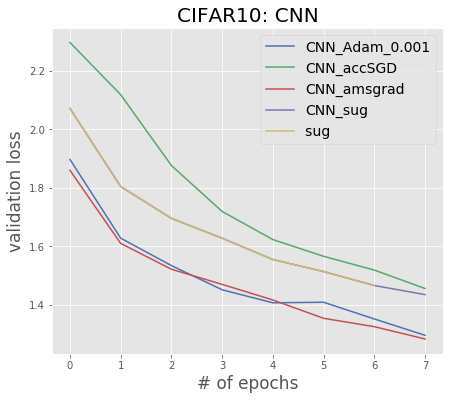

In [29]:
#plot val loss per epoch
figure = plt.figure(figsize=(7,6))
n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['val_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='CNN_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['val_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='CNN_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['val_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='CNN_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='CNN_sug')
loss_per_ep = [sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)]
for i, l in enumerate(loss_per_ep[:-2]):
    if l < loss_per_ep[i+1]:
        break      
plt.plot(loss_per_ep[:i+2], label='sug ')
#print("SUG. Time utill overfitting: {}".format(fc_sug['times'][(i+1) * batch_per_ep]))

plt.xlabel("# of epochs", fontsize=17)
plt.ylabel("validation loss", fontsize=17)
plt.title("CIFAR10: CNN", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("img/cifar_cnn_val.eps")
plt.show()

## CIFAR10 : VGG16
